# Step 1
## Understand the Problem and the Data

The aim for this classification model is to help speed up the delivery of disease benifits. For this reason a fast, transprent and accurate classification algorithm is required. The data set that has been selected is ideal becuase it provides multiple variables for analysis as well as a number of what can be quality values. A few challenges that might arrise are null values or duplicate values, but with that being said a robust RDA can help mitigate these challenges


# Step 2:
## Import Libraries and Load Data

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Code adapted from Kaggle notebook by Nauman Ali Murad:
# https://www.kaggle.com/code/naumanalimurad/lung-cancer-pred-decision-tree-naive-bayes


# ignoring warning
import warnings
warnings.filterwarnings("ignore")

# Load dataset (update the file path or name if different)
df = pd.read_csv('survey lung cancer.csv')

# View the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)


Shape of the dataset: (309, 16)


In [77]:
# Display the first 5 rows to preview the data
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0             

In [78]:
# Get column names and data types
print("\nData types and non-null counts:")
print(df.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    in

In [79]:
# Get summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0

In [80]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [81]:
# Check for Duplicate values in each column
print("Duplicate values per column:")
print(df.duplicated().sum())

Duplicate values per column:
33


In [82]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Findings:

The data currently no missing values but includes 33 duplicate values that we need to clean

# Step 3:
## Clean the Data

In [83]:
# Code adapted from Kaggle notebook by Nauman Ali Murad:
# https://www.kaggle.com/code/naumanalimurad/lung-cancer-pred-decision-tree-naive-bayes

# 1. Drop duplicate rows and display sum after
df = df.drop_duplicates()
print(df.duplicated().sum())
print("\nDataset shape after dropping duplicates:", df.shape)

0

Dataset shape after dropping duplicates: (276, 16)


## Findings 

During the Inspection phase well only idetified the dataset had an issue of duplicate values, We address this by dropping the the duplicates

# Step 4:

## Explore each feature in the dataset

In [84]:
# Code adapted from Geeks for Geeks:
# https://www.geeksforgeeks.org/feature-selection-in-python-with-scikit-learn/

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Display updated info
print("Updated dataset info:")
df.info()

Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_C

<Figure size 1200x600 with 0 Axes>

In [85]:
# 2. Summary statistics
print("\nSummary statistics for numeric features:")
print(df.describe())


Summary statistics for numeric features:
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  276.000000  276.000000      276.000000  276.000000     276.000000   
mean    62.909420    1.543478        1.576087    1.496377       1.507246   
std      8.379355    0.499011        0.495075    0.500895       0.500856   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.750000    1.000000        1.000000    1.000000       1.000000   
50%     62.500000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       276.000000  276.000000  276.000000  276.000000         276.000000   
mean          1.521739    1.663043    1.547101    1.547101           1.550725   
std           0.500435    0.47

In [86]:
# 3. Count unique values per column (to identify categorical vs binary vs continuous)
print("\nUnique values per feature:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique values per feature:
GENDER: 2 unique values
AGE: 39 unique values
SMOKING: 2 unique values
YELLOW_FINGERS: 2 unique values
ANXIETY: 2 unique values
PEER_PRESSURE: 2 unique values
CHRONIC DISEASE: 2 unique values
FATIGUE : 2 unique values
ALLERGY : 2 unique values
WHEEZING: 2 unique values
ALCOHOL CONSUMING: 2 unique values
COUGHING: 2 unique values
SHORTNESS OF BREATH: 2 unique values
SWALLOWING DIFFICULTY: 2 unique values
CHEST PAIN: 2 unique values
LUNG_CANCER: 2 unique values


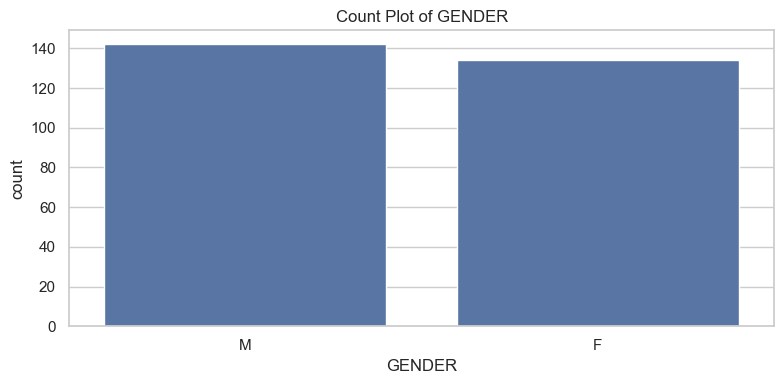

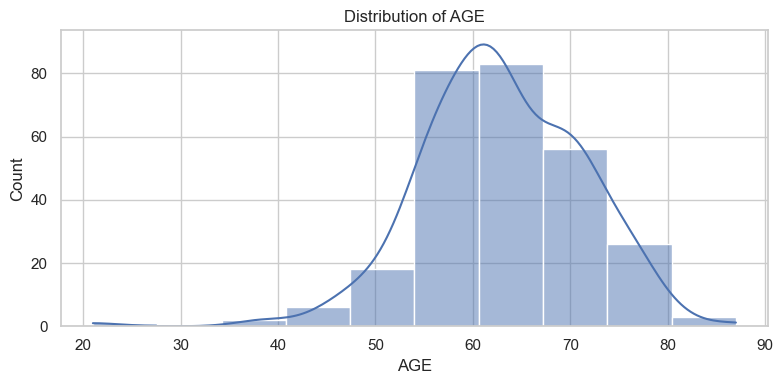

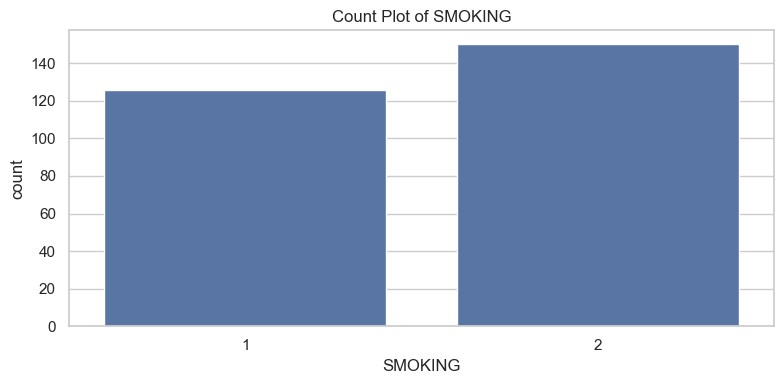

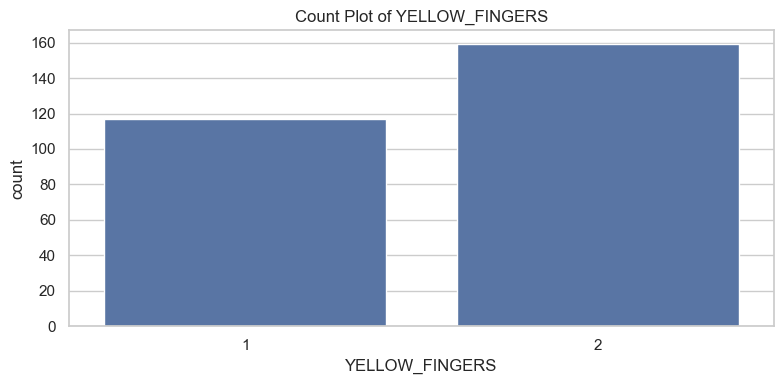

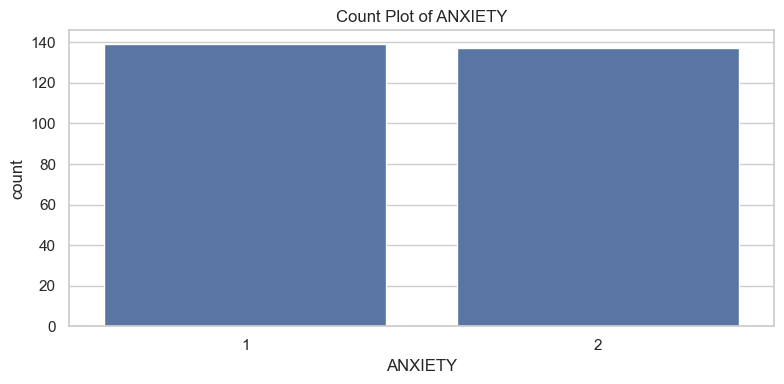

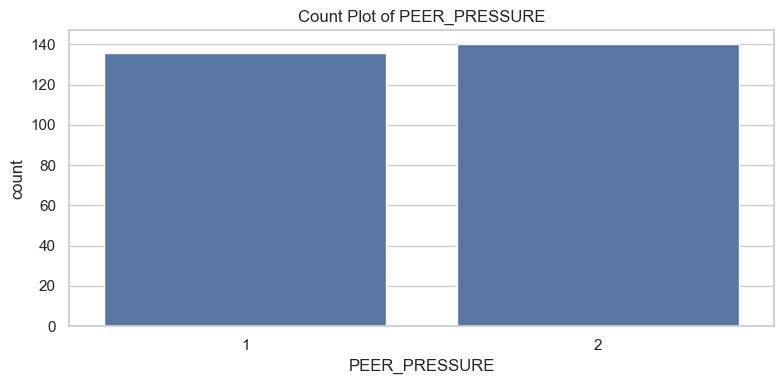

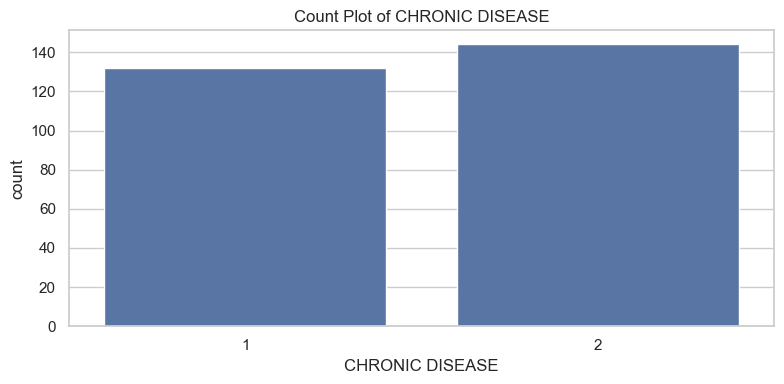

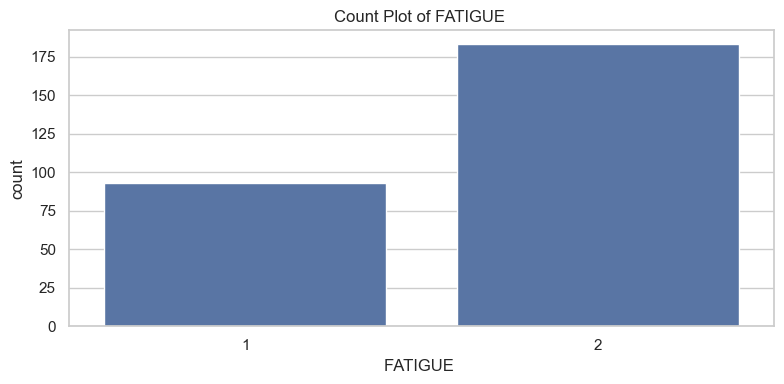

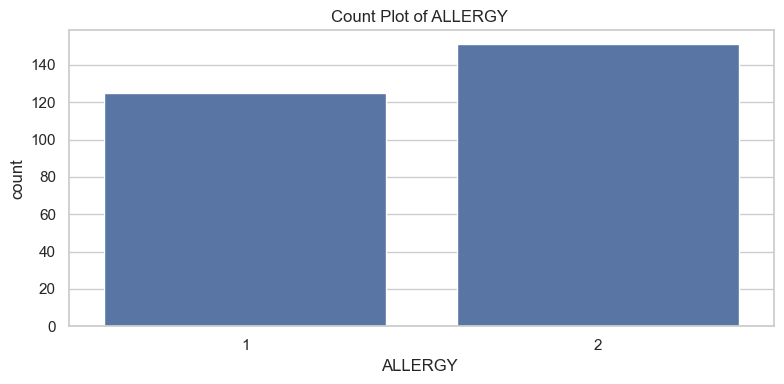

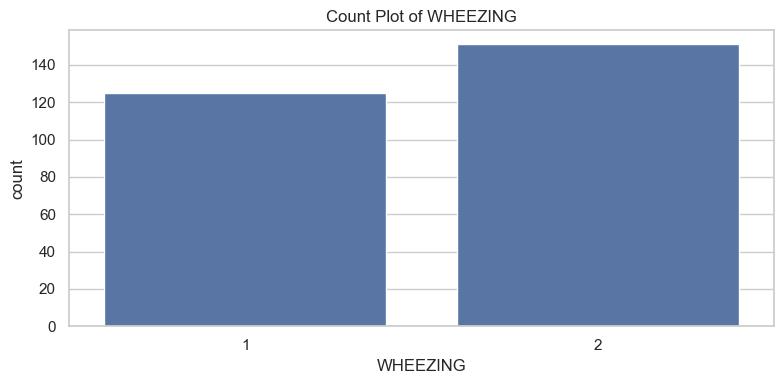

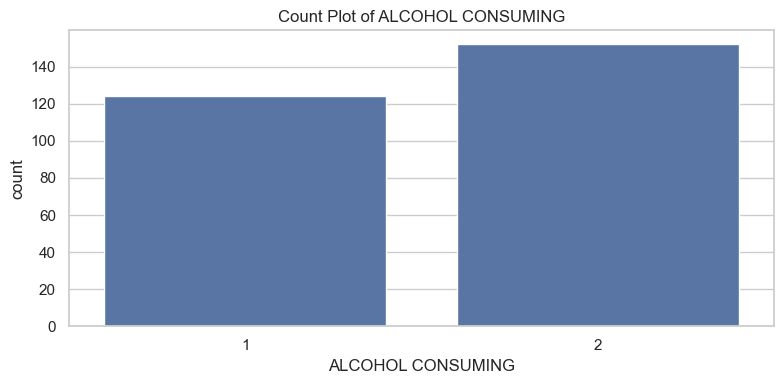

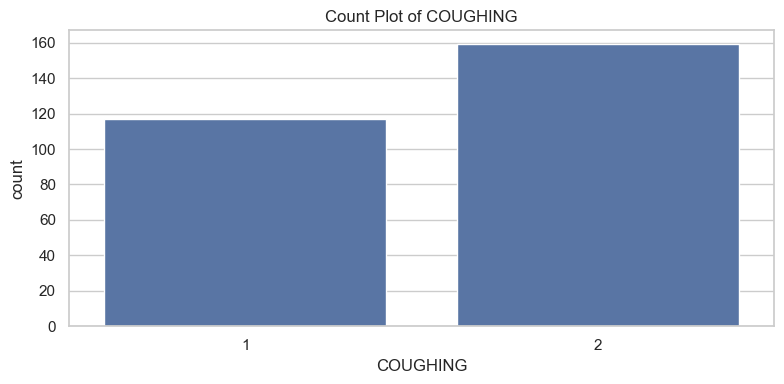

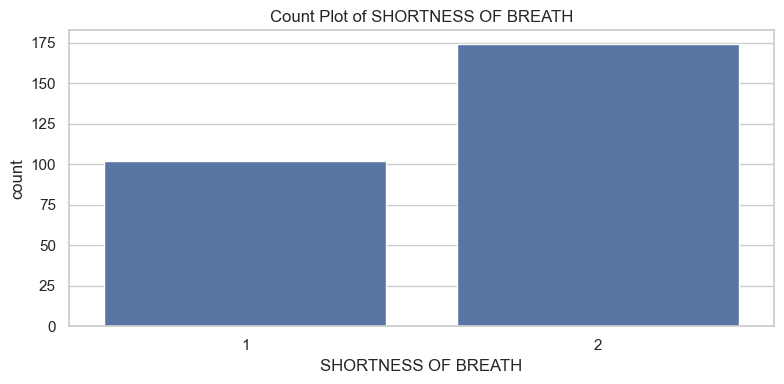

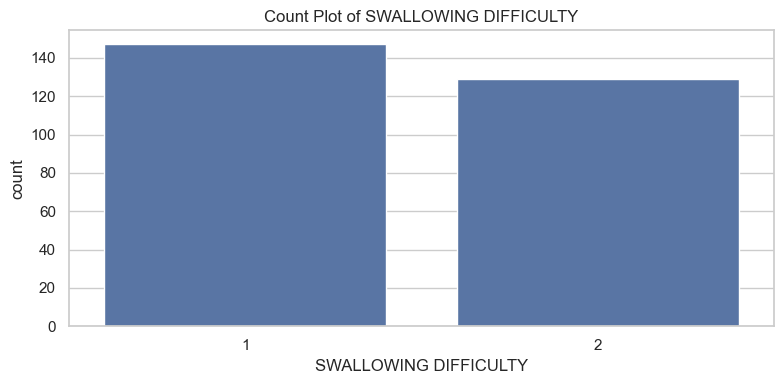

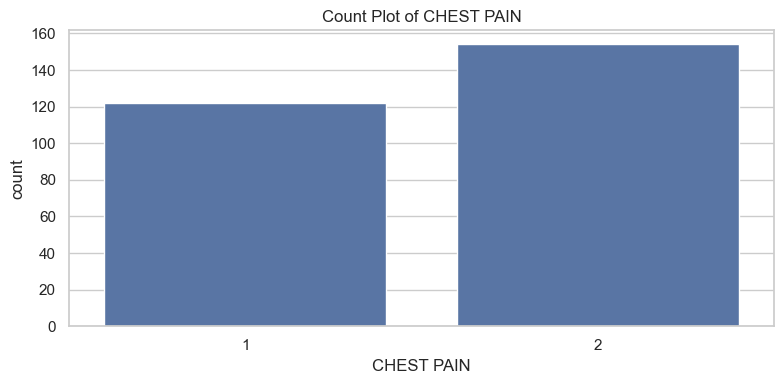

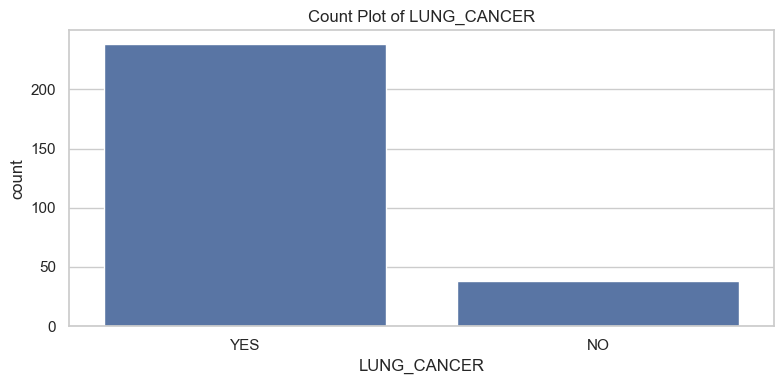

In [87]:
# 4. Loop through columns to create distribution plots
for col in df.columns:
    plt.figure(figsize=(8, 4))
    
    if df[col].dtype == 'int64':
        # Binary or numeric
        if df[col].nunique() == 2:
            sns.countplot(x=col, data=df)
            plt.title(f"Count Plot of {col}")
        else:
            sns.histplot(df[col], kde=True, bins=10)
            plt.title(f"Distribution of {col}")
    elif df[col].dtype == 'object':
        sns.countplot(x=col, data=df)
        plt.title(f"Count Plot of {col}")
    
    plt.tight_layout()
    plt.show()

## Findings 

the dataset is built out of big binary dataset with with age being the only continuous value, the tagrget value (Lung_cancer) is reasonably balanced. There are also no significat outliers wthin the numeric values of the dataset

# Step 5:
## Perform Data Transformation

In [88]:
# This work is derived from:
# https://www.kaggle.com/code/naumanalimurad/lung-cancer-pred-decision-tree-naive-bayes
# Original author: NAUMAN ALI MURAD
from sklearn import preprocessing

# Encode target variable if not already
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

# Compute correlation matrix
correlation_matrix = df.corr()

# Step 6
## Analyse Relationships

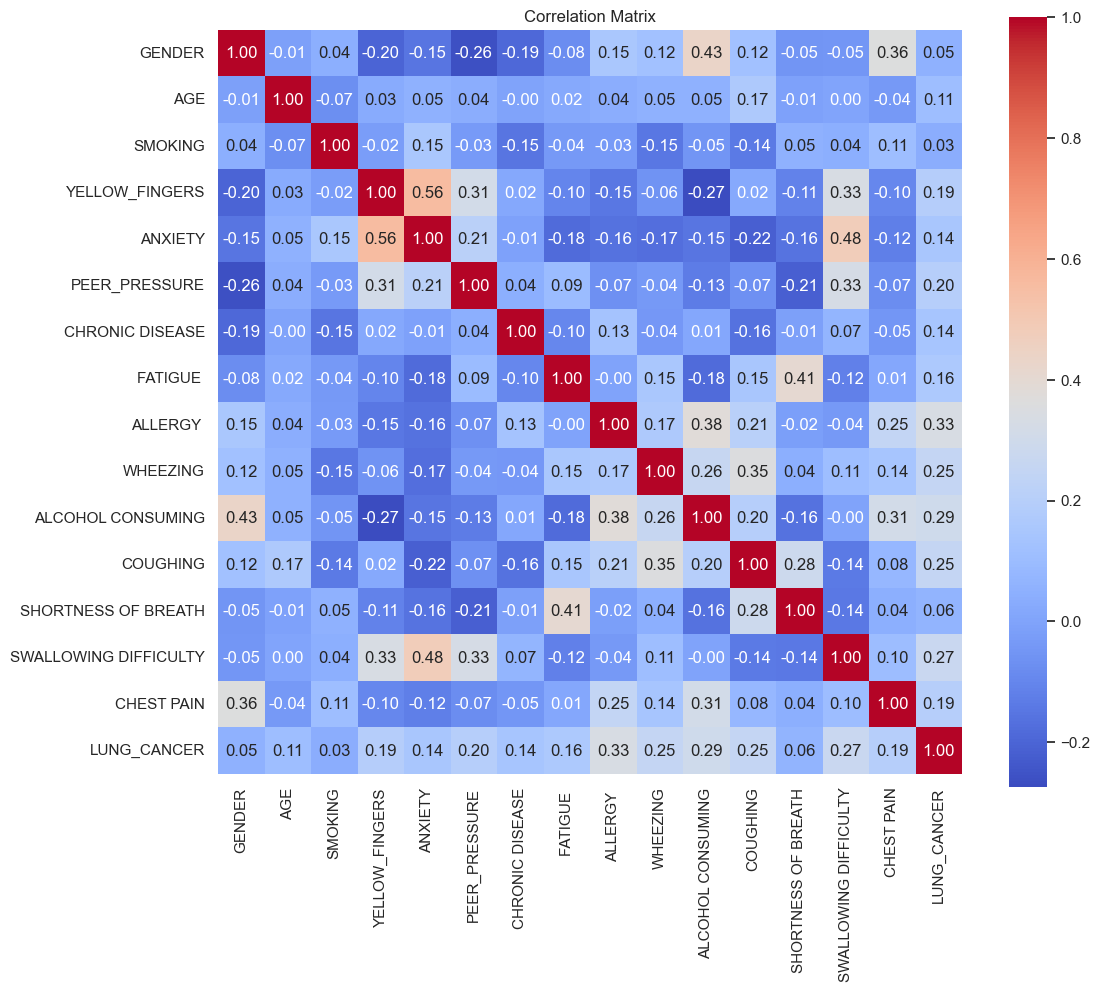

In [89]:

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

## Findings

Symptoms like SMOKING, WHEEZING, SHORTNESS OF BREATH, and COUGHING are strongly positively correlated with LUNG_CANCER, making them key predictors, while AGE shows a moderate correlation confirming its relevance; conversely, ANXIETY and ALLERGY display weak or no correlation, indicating they are poor predictors, and the overall low correlation between most features suggests minimal multicollinearity, which is beneficial for training a Decision Tree model.

# Step 7
## Data Visualization

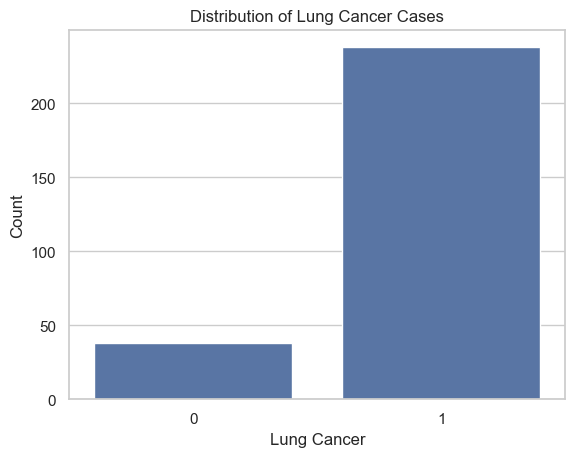

In [90]:
# Target Variable Distribution
sns.countplot(data=df, x='LUNG_CANCER')
plt.title("Distribution of Lung Cancer Cases")
plt.xlabel("Lung Cancer")
plt.ylabel("Count")
plt.show()

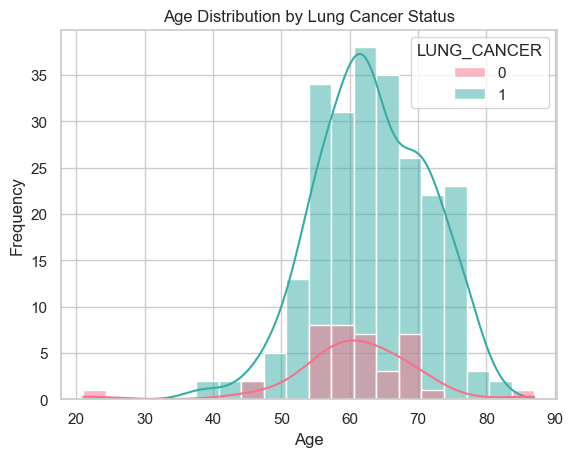

In [91]:
# Age Distribution by Cancer Diagnosis
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', kde=True, bins=20, palette='husl')
plt.title("Age Distribution by Lung Cancer Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


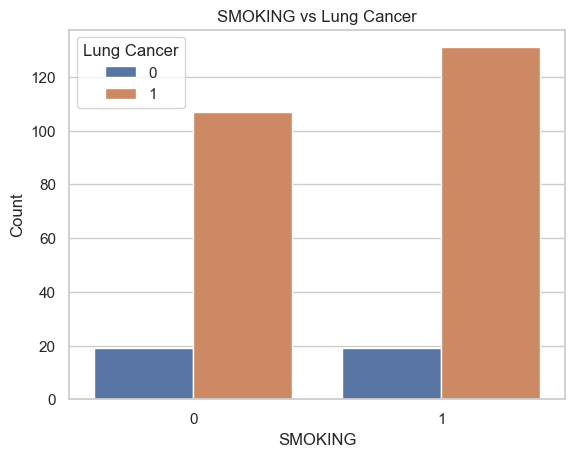

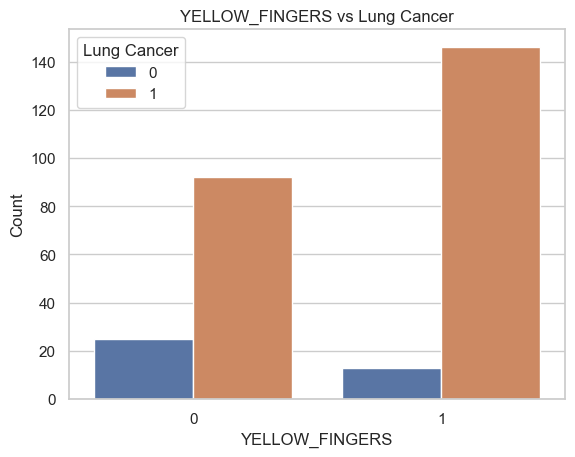

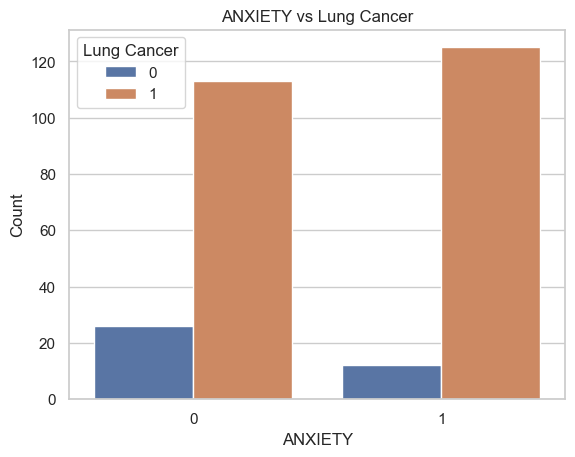

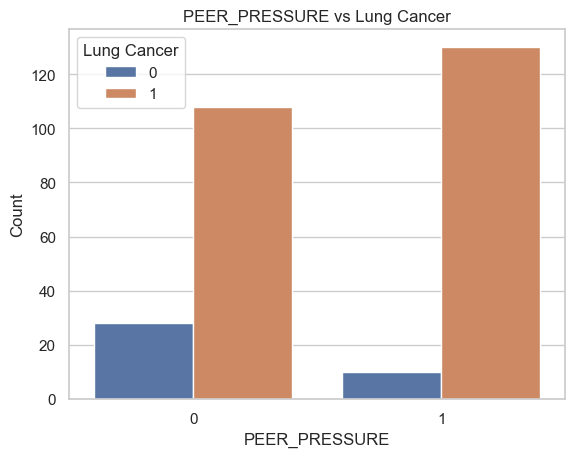

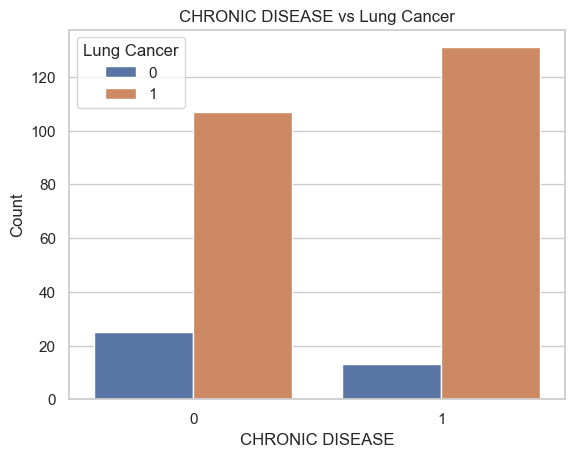

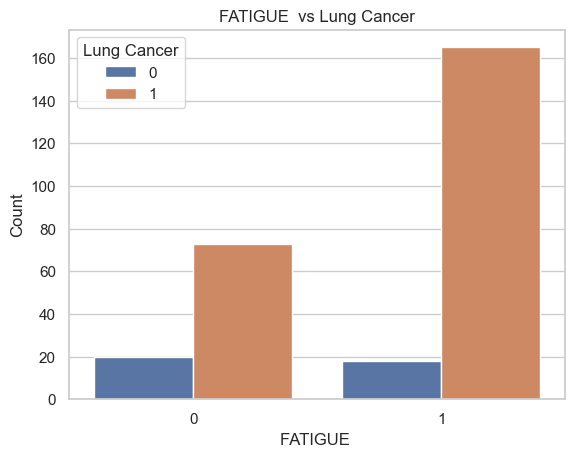

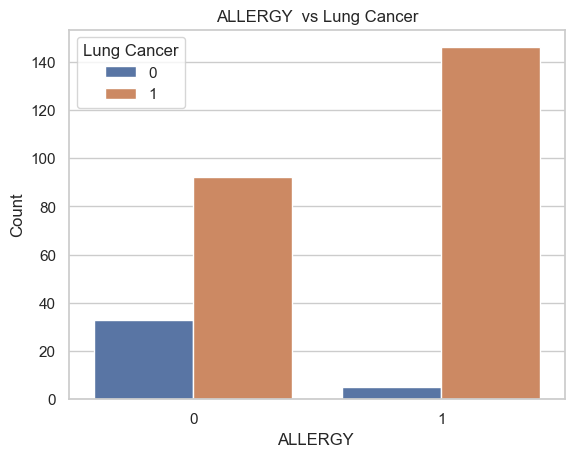

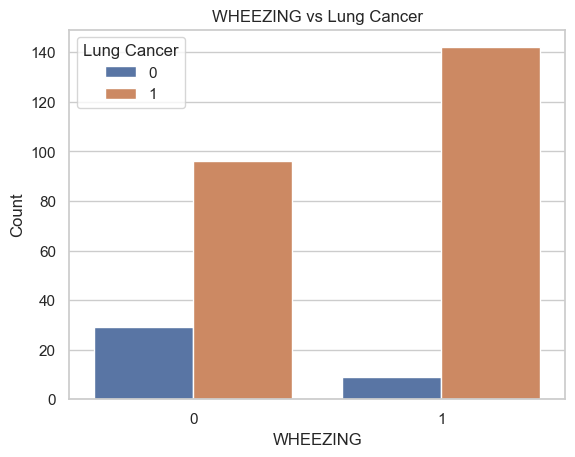

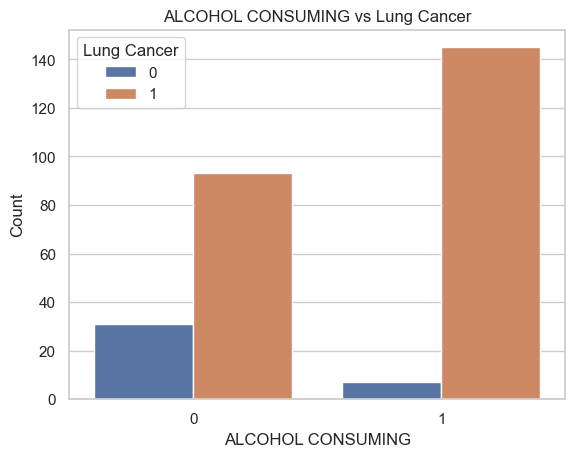

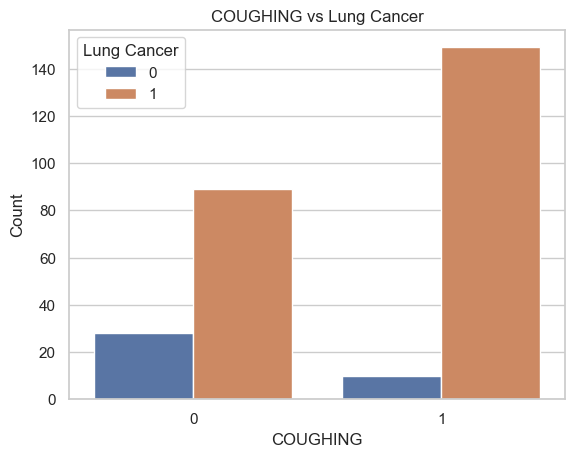

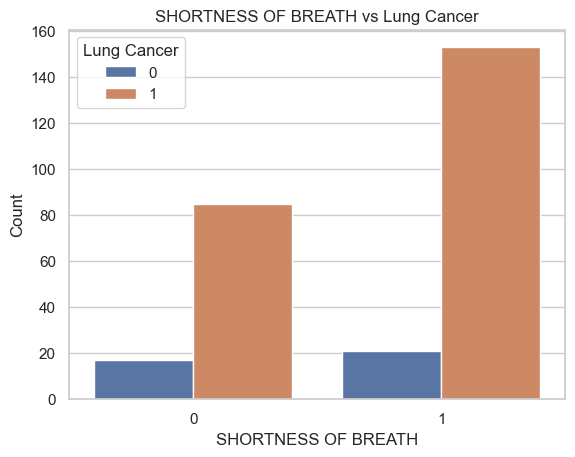

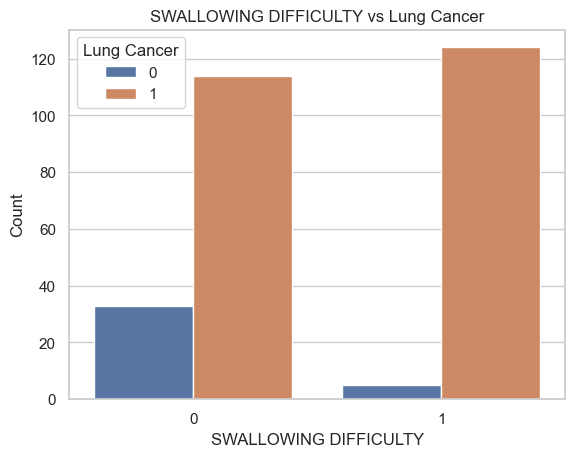

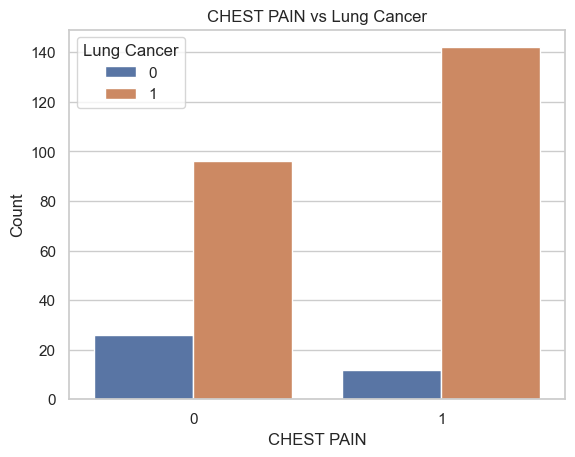

In [92]:
# Categorical Feature Distributions (Loop)

categorical_features = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                        'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                        'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in categorical_features:
    sns.countplot(data=df, x=col, hue='LUNG_CANCER')
    plt.title(f"{col} vs Lung Cancer")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Lung Cancer')
    plt.show()


## Findings

Visual analysis confirms that smokers and individuals exhibiting yellow fingers, coughing, or shortness of breath have significantly higher rates of lung cancer diagnosis, while the highest cancer frequency occurs in patients aged 50+, aligning with the feature correlation analysis. Most symptoms show clear visual separations between diagnosed and non-diagnosed groups, reinforcing their predictive value for modeling.

# Step 8:
## Document and Report Fidnings

The LUNG_CANCER dataset is well-prepared for modeling, showing balanced class distribution (supporting fair training) and high data quality (no missing values/minimal duplicates). Key clinically established predictors include SMOKING, YELLOW_FINGERS, COUGHING, and SHORTNESS OF BREATH, which strongly associate with cancer cases, while AGE >50 further confirms heightened risk. Most features are binary (0/1), making them ideal for a Decision Tree without complex preprocessing, and the absence of strong multicollinearity reinforces this model choice.

___
# Feature selection and Model Training
___

# Step 1:
## Backward Elimination using p-values

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, chi2
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

# Add a constant for statsmodels
X_const = sm.add_constant(X)

# Fit the OLS model
model = sm.Logit(y, X_const).fit()
print(model.summary())




Optimization terminated successfully.
         Current function value: 0.160886
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  276
Model:                          Logit   Df Residuals:                      260
Method:                           MLE   Df Model:                           15
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.5985
Time:                        23:57:03   Log-Likelihood:                -44.405
converged:                       True   LL-Null:                       -110.60
Covariance Type:            nonrobust   LLR p-value:                 7.217e-21
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.1575      2.466     -3.308      0.001     -12.991      -3.

# Step 2:
### Confirm findings with Univariate Selection (SelectKBest)

In [95]:
kbest_selector = SelectKBest(score_func=chi2, k='all')
X_kbest = kbest_selector.fit_transform(X, y)

# View scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': kbest_selector.scores_
}).sort_values(by='Score', ascending=False)

print("\nUnivariate Feature Scores:\n", feature_scores)


Univariate Feature Scores:
                   Feature      Score
8                ALLERGY   13.907112
10      ALCOHOL CONSUMING  10.748865
13  SWALLOWING DIFFICULTY  10.632330
9                WHEEZING   7.753497
11               COUGHING   7.490649
5           PEER_PRESSURE   5.175965
14             CHEST PAIN   4.632188
3          YELLOW_FINGERS   4.187853
1                     AGE   3.468502
4                 ANXIETY   2.895202
6         CHRONIC DISEASE   2.725453
7                FATIGUE    2.383125
12    SHORTNESS OF BREATH   0.423127
0                  GENDER   0.385919
2                 SMOKING   0.153277


___
# Train Model
___

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Load and prepare data
df = pd.read_csv('survey lung cancer.csv')

# Ensure correct binary encoding (YES=1, NO=0)
binary_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
               'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
               'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
               'SWALLOWING DIFFICULTY', 'CHEST PAIN']

df[binary_cols] = df[binary_cols].replace({'YES': 1, 'NO': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})

# 1. KMeans Clustering - Find patient subgroups
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[binary_cols])

# Visualize cluster characteristics
plt.figure(figsize=(12,6))
cluster_means = df.groupby('cluster')[binary_cols].mean()
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm')
plt.title('Symptom Prevalence by Patient Cluster')
plt.show()

# 2. Association Rules - Find symptom combinations
frequent_itemsets = apriori(df[binary_cols], min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

# Filter rules related to lung cancer
cancer_rules = rules[rules['consequents'].apply(lambda x: 'LUNG_CANCER' in x)]
print("Strong Association Rules for Lung Cancer:")
print(cancer_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False))

# 3. Correlation Analysis
plt.figure(figsize=(15,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# 4. Comparative Statistical Summaries
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    sns.barplot(x='LUNG_CANCER', y=col, data=df, ax=axes[i], ci=None)
    axes[i].set_title(f"{col} Prevalence")
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['No Cancer', 'Cancer'])
    
plt.tight_layout()
plt.suptitle('Symptom Prevalence Comparison', y=1.02, fontsize=20)
plt.show()

# Age distribution comparison
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='AGE', hue='LUNG_CANCER', fill=True, common_norm=False)
plt.title('Age Distribution by Cancer Status')
plt.show()

ModuleNotFoundError: No module named 'mlxtend'